In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
import torch

In [4]:
TRAIN_DATASET_PATH = "/content/drive/MyDrive/FYP/Davidson_Sampling/train_new.csv"
VALID_DATASET_PATH = "/content/drive/MyDrive/FYP/Davidson_Sampling/valid_new.csv"
TEST_DATASET_PATH = "/content/drive/MyDrive/FYP/Davidson_Sampling/test.csv"
# TRAIN_DATASET_PATH = "train_new.csv"
# VALID_DATASET_PATH = "valid_new.csv"
# TEST_DATASET_PATH = "test.csv"

In [5]:
train_dataset= pd.read_csv(TRAIN_DATASET_PATH)

In [6]:
train_dataset

,tweet,label
0,"""@RenegadeMo: Fat hoes get chose"" lol",1
1,That ho went from darkskinned to mulatto RT @F...,1
2,@NeoDaRegularGuy Oil? who said sumthin bout oi...,1
3,Wrote the absolute worst paper of my life last...,1
4,"I don't care how hot a bitch is, if her person...",1
...,...,...
15607,I love how hoes be like omg warped tour yayyyy...,1
15608,RT @saramariewelch: Been my main nigguh since ...,0
15609,Deez hoes be actin up..,1
15610,I'm sorry.. I'm sorry.. I can't fuc wit u no m...,1


In [7]:
test_dataset = pd.read_csv(TEST_DATASET_PATH)

In [8]:
valid_dataset = pd.read_csv(VALID_DATASET_PATH)

In [9]:
# Load model directly
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
model = AutoModel.from_pretrained("bert-base-cased")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [10]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [11]:
model.to(device)
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(28996, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [12]:
seq_len = [len(tweet.split()) for tweet in train_dataset['tweet']]

In [13]:
percentile_90 = np.percentile(seq_len, 90)

In [14]:
percentile_90

24.0

<Axes: >

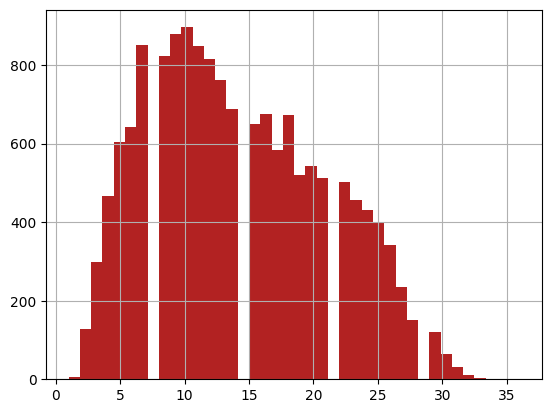

In [15]:
pd.Series(seq_len).hist(bins=40,color='firebrick')

In [16]:
MAX_LENGTH = 24

In [17]:
from torch.utils.data import DataLoader

#Train

In [18]:
train_tokens= tokenizer.batch_encode_plus(train_dataset["tweet"].tolist(),padding='max_length',max_length=MAX_LENGTH,truncation=True)

In [19]:
# import torch
# train_seq = torch.tensor(train_tokens['input_ids'])
# train_mask = torch.tensor(train_tokens['attention_mask'])
# train_y = torch.tensor(train_dataset['label'].tolist())

In [20]:
# tokenized_train_datasets=train_tokens.remove_columns(['text'])

In [21]:
# tokenized_train_datasets=t.with_format("torch")
from torch.utils.data import TensorDataset

# Assuming train_tokens contains the tokenized and encoded inputs
input_ids = torch.tensor(train_tokens['input_ids'])
attention_masks = torch.tensor(train_tokens['attention_mask'])

# Create a TensorDataset
train_new_dataset = TensorDataset(input_ids, attention_masks)

# Use the DataLoader with the TensorDataset
train_dataloader = DataLoader(train_new_dataset, batch_size=400, shuffle=False)

In [22]:
train_dataset['label']

0        1
1        1
2        1
3        1
4        1
        ..
15607    1
15608    0
15609    1
15610    1
15611    1
Name: label, Length: 15612, dtype: int64

In [23]:
train_dataloader

In [24]:
# train_seq = torch.tensor(train_tokens['input_ids'])
# train_mask = torch.tensor(train_tokens['attention_mask'])
# train_y = torch.tensor(train_dataset['label'].tolist())

# test_seq = torch.tensor(test_tokens['input_ids'])
# test_mask = torch.tensor(test_tokens['attention_mask'])
# test_y = torch.tensor(test_dataset['label'].tolist())

In [25]:
all_outputs_train_tensor = torch.tensor([], device=device)

In [26]:
# for batch in train_dataloader:
#         print(batch)
#         batch = {k: v.to(device) for k, v in batch.items()}
#         with torch.no_grad():
#           outs = model(batch['input_ids'], token_type_ids=None, attention_mask=batch['attention_mask'])
#           bert_cls_hidden_state= outs[1]
#           print(bert_cls_hidden_state)
#           all_outputs_train_tensor = torch.cat([all_outputs_train_tensor, bert_cls_hidden_state], dim=0)


In [27]:
for batch in train_dataloader:
    input_ids, attention_masks = batch
    input_ids = input_ids.to(device)
    attention_masks = attention_masks.to(device)

    with torch.no_grad():
        outs = model(input_ids, token_type_ids=None, attention_mask=attention_masks)
        bert_cls_hidden_state = outs[1]
        all_outputs_train_tensor = torch.cat([all_outputs_train_tensor, bert_cls_hidden_state], dim=0)


In [28]:
all_outputs_train_cpu = all_outputs_train_tensor.cpu()

In [29]:
all_outputs_train_numpy = all_outputs_train_cpu.numpy()

In [30]:
all_outputs_train_numpy

array([[-0.3832053 ,  0.32684368,  0.9979422 , ...,  0.99965185,
        -0.9590626 ,  0.98171335],
       [-0.5225026 ,  0.37124565,  0.99973464, ...,  0.9999466 ,
        -0.8835276 ,  0.99247867],
       [-0.41788495,  0.28820515,  0.9983623 , ...,  0.9995964 ,
        -0.94373363,  0.9767198 ],
       ...,
       [-0.6218151 ,  0.48729554,  0.9997465 , ...,  0.9999241 ,
        -0.86735415,  0.9908282 ],
       [-0.5067565 ,  0.34441438,  0.9994293 , ...,  0.99981534,
        -0.8652753 ,  0.9825056 ],
       [-0.5095924 ,  0.3374002 ,  0.99936545, ...,  0.9998191 ,
        -0.8718265 ,  0.96872675]], dtype=float32)

In [31]:
import pandas as pd

# Assuming train_dataset['label'] is a numpy array
labels = train_dataset['label']

# Convert numpy arrays to pandas DataFrames
features_df = pd.DataFrame(all_outputs_train_numpy)
labels_df = pd.DataFrame(labels)

# Concatenate features and labels along columns axis
combined_df = pd.concat([features_df, labels_df], axis=1)




In [32]:
combined_df

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,label
0,-0.383205,0.326844,0.997942,-0.979856,0.854735,0.980582,0.922652,-0.999283,-0.912801,-0.331264,...,-0.752901,0.701615,-0.909913,-0.666051,-0.802466,-0.085109,0.999652,-0.959063,0.981713,1
1,-0.522503,0.371246,0.999735,-0.993230,0.962953,0.960373,0.986549,-0.995536,-0.974949,-0.649686,...,-0.339802,0.652501,-0.697245,-0.513023,-0.647931,-0.107362,0.999947,-0.883528,0.992479,1
2,-0.417885,0.288205,0.998362,-0.973745,0.881352,0.974623,0.922264,-0.998932,-0.896370,-0.529604,...,-0.662854,0.609361,-0.814918,-0.633098,-0.730682,-0.049372,0.999596,-0.943734,0.976720,1
3,-0.844678,0.537586,0.999977,-0.997871,0.984660,0.907638,0.997470,-0.969801,-0.991237,-0.763001,...,-0.133802,0.512674,-0.100483,-0.176753,-0.231300,-0.190174,0.999993,-0.507830,0.996279,1
4,-0.510242,0.369174,0.999793,-0.993181,0.963288,0.976351,0.985624,-0.997591,-0.958980,-0.591407,...,-0.432610,0.851742,-0.692180,-0.495008,-0.637025,0.010875,0.999939,-0.860290,0.989643,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15607,-0.517059,0.451385,0.999560,-0.990894,0.906192,0.981745,0.964266,-0.997674,-0.953544,-0.558863,...,-0.400510,0.697153,-0.816746,-0.584314,-0.755272,-0.183945,0.999880,-0.962968,0.985897,1
15608,-0.648502,0.374194,0.999596,-0.992606,0.910230,0.954847,0.972957,-0.995479,-0.952117,-0.546383,...,-0.429350,0.569648,-0.710617,-0.443599,-0.607506,-0.149714,0.999901,-0.899316,0.984626,0
15609,-0.621815,0.487296,0.999747,-0.993657,0.942682,0.928996,0.977018,-0.987358,-0.973295,-0.577159,...,-0.207544,0.357838,-0.651940,-0.324249,-0.600809,-0.281772,0.999924,-0.867354,0.990828,1
15610,-0.506756,0.344414,0.999429,-0.989630,0.955132,0.956637,0.979108,-0.993865,-0.951506,-0.585674,...,-0.343166,0.605949,-0.626057,-0.410455,-0.668681,-0.207600,0.999815,-0.865275,0.982506,1


#Test

In [33]:
test_tokens = tokenizer.batch_encode_plus(test_dataset['tweet'].tolist(),padding='max_length',max_length=MAX_LENGTH,truncation=True)

In [34]:
# tokenized_train_datasets=t.with_format("torch")
from torch.utils.data import TensorDataset

# Assuming train_tokens contains the tokenized and encoded inputs
input_ids = torch.tensor(test_tokens['input_ids'])
attention_masks = torch.tensor(test_tokens['attention_mask'])

# Create a TensorDataset
test_new_dataset = TensorDataset(input_ids, attention_masks)

# Use the DataLoader with the TensorDataset
test_dataloader = DataLoader(test_new_dataset, batch_size=400, shuffle=False)

In [35]:
all_outputs_test_tensor = torch.tensor([], device=device)

In [36]:
# for batch in test_dataloader:
#         batch = {k: v.to(device) for k, v in batch.items()}
#         with torch.no_grad():
#           outs = model(batch['input_ids'], token_type_ids=None, attention_mask=batch['attention_mask'])
#           b_logit_pred = outs.logits

#           pred_label = torch.sigmoid(b_logit_pred)

#           all_outputs_test_tensor = torch.cat([all_outputs_test_tensor, pred_label], dim=0)
#           print(all_outputs_test_tensor)

In [37]:
for batch in test_dataloader:
    input_ids, attention_masks = batch
    input_ids = input_ids.to(device)
    attention_masks = attention_masks.to(device)

    with torch.no_grad():
        outs = model(input_ids, token_type_ids=None, attention_mask=attention_masks)
        bert_cls_hidden_state = outs[1]
        all_outputs_test_tensor = torch.cat([all_outputs_test_tensor, bert_cls_hidden_state], dim=0)


In [38]:
all_outputs_test_cpu = all_outputs_test_tensor.cpu()

In [39]:
all_outputs_test_numpy = all_outputs_test_cpu.numpy()

In [40]:
import pandas as pd

# Assuming train_dataset['label'] is a numpy array
labels = test_dataset['label']

# Convert numpy arrays to pandas DataFrames
features_test_df = pd.DataFrame(all_outputs_test_numpy)
labels_test_df = pd.DataFrame(labels)

# Concatenate features and labels along columns axis
combined_test_df = pd.concat([features_test_df, labels_test_df], axis=1)




In [41]:
combined_test_df

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,label
0,-0.563852,0.355946,0.999520,-0.988966,0.943894,0.967823,0.958591,-0.998111,-0.962408,-0.502939,...,-0.639113,0.542176,-0.812150,-0.483407,-0.709742,-0.050320,0.999904,-0.881712,0.985958,1
1,-0.661823,0.404637,0.999603,-0.989235,0.937256,0.920831,0.967832,-0.990444,-0.958681,-0.588295,...,-0.189832,0.325946,-0.614125,-0.475777,-0.550387,-0.055150,0.999910,-0.738088,0.991131,1
2,-0.617364,0.423864,0.999739,-0.993153,0.948712,0.972534,0.977785,-0.997851,-0.975495,-0.572439,...,-0.557014,0.708714,-0.779750,-0.503390,-0.692852,-0.186373,0.999940,-0.893831,0.990534,2
3,-0.509701,0.310799,0.998942,-0.987324,0.896560,0.977423,0.955697,-0.998531,-0.936142,-0.462010,...,-0.698387,0.669888,-0.828374,-0.585294,-0.737801,-0.150873,0.999817,-0.930941,0.984339,1
4,-0.624756,0.433311,0.999856,-0.995817,0.969221,0.978452,0.985984,-0.997097,-0.982216,-0.590116,...,-0.369237,0.677011,-0.812847,-0.397249,-0.765846,-0.197440,0.999966,-0.937866,0.994366,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,-0.686608,0.442155,0.999754,-0.991830,0.917533,0.906220,0.960298,-0.988996,-0.955720,-0.483228,...,-0.213064,0.118803,-0.718873,-0.406157,-0.460433,-0.183350,0.999954,-0.693699,0.987976,1
2475,-0.456916,0.338015,0.999469,-0.988905,0.921267,0.978007,0.974136,-0.998027,-0.965038,-0.417661,...,-0.577594,0.688572,-0.799800,-0.640288,-0.740699,-0.075981,0.999901,-0.906186,0.991022,2
2476,-0.640791,0.440350,0.999874,-0.994214,0.956262,0.913960,0.976295,-0.983393,-0.978278,-0.534385,...,-0.185915,0.297641,-0.736829,-0.473374,-0.584401,-0.193535,0.999976,-0.660820,0.993215,1
2477,-0.611086,0.436927,0.999640,-0.987555,0.913942,0.924445,0.957033,-0.991539,-0.937329,-0.474450,...,-0.178396,0.396098,-0.739390,-0.430134,-0.573205,-0.160136,0.999915,-0.750050,0.979491,2


In [42]:
# with torch.no_grad():
#     train_outputs = model(input_ids=train_seq, attention_mask=train_mask)

# # Extract the embeddings from the BERT model
# train_embeddings = train_outputs.last_hidden_state[:, 0, :].numpy()

In [43]:
x_train_features = combined_df.iloc[:, :-1]
y_train_lables = combined_df['label']

In [44]:
x_test_features = combined_test_df.iloc[:, :-1]
y_test_lables = combined_test_df['label']

#Valid

In [45]:
valid_tokens = tokenizer.batch_encode_plus(valid_dataset['tweet'].tolist(),padding='max_length',max_length=MAX_LENGTH,truncation=True)

In [46]:
# tokenized_train_datasets=t.with_format("torch")
from torch.utils.data import TensorDataset

# Assuming train_tokens contains the tokenized and encoded inputs
input_ids = torch.tensor(valid_tokens['input_ids'])
attention_masks = torch.tensor(valid_tokens['attention_mask'])

# Create a TensorDataset
valid_new_dataset = TensorDataset(input_ids, attention_masks)

# Use the DataLoader with the TensorDataset
valid_dataloader = DataLoader(valid_new_dataset, batch_size=400, shuffle=False)

In [47]:
all_outputs_valid_tensor = torch.tensor([], device=device)

In [48]:
for batch in valid_dataloader:
    input_ids, attention_masks = batch
    input_ids = input_ids.to(device)
    attention_masks = attention_masks.to(device)

    with torch.no_grad():
        outs = model(input_ids, token_type_ids=None, attention_mask=attention_masks)
        bert_cls_hidden_state = outs[1]
        all_outputs_valid_tensor = torch.cat([all_outputs_valid_tensor, bert_cls_hidden_state], dim=0)


In [49]:
all_outputs_valid_cpu = all_outputs_valid_tensor.cpu()

In [50]:
all_outputs_valid_numpy = all_outputs_valid_cpu.numpy()

In [51]:
import pandas as pd

# Assuming train_dataset['label'] is a numpy array
labels = valid_dataset['label']

# Convert numpy arrays to pandas DataFrames
features_valid_df = pd.DataFrame(all_outputs_valid_numpy)
labels_valid_df = pd.DataFrame(labels)

# Concatenate features and labels along columns axis
combined_valid_df = pd.concat([features_valid_df, labels_valid_df], axis=1)




In [52]:
combined_valid_df

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,label
0,-0.577979,0.298336,0.999545,-0.992270,0.946919,0.964737,0.972464,-0.997435,-0.951312,-0.637291,...,-0.311257,0.557864,-0.709175,-0.375992,-0.589447,0.011131,0.999917,-0.908943,0.990257,2
1,-0.604915,0.430538,0.999706,-0.993354,0.937797,0.974008,0.966594,-0.997425,-0.978537,-0.563418,...,-0.591536,0.568005,-0.867648,-0.570051,-0.687367,-0.179229,0.999936,-0.935865,0.993195,1
2,-0.696555,0.467489,0.999842,-0.991919,0.952816,0.930893,0.976305,-0.987287,-0.961600,-0.622485,...,-0.124201,0.414457,-0.587600,-0.283881,-0.326387,-0.245356,0.999951,-0.822135,0.985326,0
3,-0.567097,0.457727,0.999753,-0.993755,0.959481,0.988019,0.982972,-0.999025,-0.968970,-0.541057,...,-0.458373,0.833434,-0.856474,-0.502121,-0.755809,-0.099580,0.999942,-0.926015,0.991330,1
4,-0.388337,0.358488,0.999285,-0.987273,0.899238,0.980706,0.953000,-0.998787,-0.945507,-0.501278,...,-0.647868,0.740028,-0.813685,-0.617422,-0.768744,-0.100356,0.999837,-0.954088,0.985502,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6687,-0.752808,0.491303,0.999962,-0.997201,0.974816,0.879301,0.993603,-0.959804,-0.984892,-0.740588,...,-0.223511,0.450662,-0.341493,-0.167386,-0.327114,-0.386488,0.999992,-0.489292,0.994714,1
6688,-0.651750,0.429454,0.999931,-0.997385,0.978436,0.965510,0.995005,-0.995250,-0.991876,-0.614943,...,-0.674784,0.751249,-0.668607,-0.389724,-0.545515,-0.137548,0.999980,-0.864096,0.996264,1
6689,-0.580318,0.435639,0.999595,-0.989595,0.937139,0.952665,0.971345,-0.995544,-0.955870,-0.569860,...,-0.349167,0.650557,-0.737781,-0.482048,-0.672955,-0.103984,0.999917,-0.849873,0.983000,0
6690,-0.701532,0.428252,0.999824,-0.993375,0.942661,0.961801,0.980026,-0.995349,-0.977268,-0.481703,...,-0.315360,0.405191,-0.767649,-0.394658,-0.721020,-0.119781,0.999966,-0.859262,0.994018,2


In [53]:
x_valid_features = combined_valid_df.iloc[:, :-1]
y_valid_lables = combined_valid_df['label']

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [55]:
def score(y_test_lables,y_pred):
  accuracy = accuracy_score(y_test_lables, y_pred)
  precision = precision_score(y_test_lables, y_pred,average='macro')
  recall = recall_score(y_test_lables, y_pred,average='macro')
  f1 = f1_score(y_test_lables, y_pred,average='macro')
  conf_matrix = confusion_matrix(y_test_lables, y_pred)
  return accuracy,precision,recall,f1,conf_matrix

#LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logistic_regression = LogisticRegression()
param_grid = {
    'C': [0.001, 0.01, 0.1],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear','saga']
}

grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_valid_features, y_valid_lables)

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
y_pred = grid_search.predict(x_test_features)


In [ ]:
accuracy,precision,recall,f1,conf_matrix = score (y_test_lables,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f1)
print(accuracy)
print(recall)
print(precision)
print(conf_matrix)

0.4323094255120752
0.8019362646228317
0.4225060282098884
0.5141048579483843
[[   0  156    8]
 [   0 1871   34]
 [   0  293  117]]


#XGBoost

In [ ]:
# !pip install xgboost
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameter grid
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'subsample': [0.5, 0.7, 1]
# }

# # Create the XGBoost model object
# xgb_model = XGBClassifier()

# # Create the GridSearchCV object
# grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# # Fit the GridSearchCV object to the training data
# grid_search.fit(x_valid_features, y_valid_lables)

# # Print the best set of hyperparameters and the corresponding score
# print("Best set of hyperparameters: ", grid_search.best_params_)

In [ ]:
# y_pred = grid_search.predict(x_test_features)

In [ ]:
# accuracy,precision,recall,f1,conf_matrix = score(y_test_lables,y_pred)

In [ ]:
# print(f1)
# print(accuracy)
# print(recall)
# print(precision)
# print(conf_matrix)

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_valid_features, y_valid_lables)

print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [ ]:
y_pred = grid_search.predict(x_test_features)

In [ ]:
accuracy,precision,recall,f1,conf_matrix = score (y_test_lables,y_pred)

In [ ]:
print(f1)
print(accuracy)
print(recall)
print(precision)
print(conf_matrix)

0.3722618419484962
0.7841871722468737
0.37780125045344937
0.5022991082041146
[[   0  160    4]
 [   1 1885   19]
 [   2  349   59]]


#SVC

In [ ]:
#Hyper Parameter Tuning For SVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
# param_grid = {'C': [0.1, 1, 10],
#              'gamma': [1, 0.1, 0.01],
#              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, cv=5, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(x_valid_features, y_valid_lables)
grid.best_params_


In [ ]:
print("Best Parameters:", grid.best_params_)

In [ ]:
y_pred = grid.predict(x_test_features)

In [ ]:
accuracy,precision,recall,f1,conf_matrix = score (y_test_lables,y_pred)

In [ ]:
print(f1)
print(accuracy)
print(recall)
print(precision)
print(conf_matrix)